# Braiding Phase $\varphi_{br}$ by depletion profile

# Note that use torus_distence() function in Charge calculation

https://arxiv.org/pdf/1910.05222.pdf (Section B. Lattice generalization)

In [413]:
using NBInclude
using Plots
using LaTeXStrings
using SparseArrays
using DataFrames
using Interpolations
using LinearAlgebra
using ProgressMeter
@nbinclude("Hofstadter Single Particle in Julia.ipynb")
@nbinclude("../First Band Approximation Functions.ipynb")
@nbinclude("../Hofstadter Many Body Utils.ipynb")
@nbinclude("../Braiding Utils.ipynb")
@nbinclude("Torus_Distance.ipynb")
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb");

In [443]:
Nx=10
Ny=8
p=1
q=10
par_num = 3
U = 2
V_Strength = 4

N=Nx*Ny
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [i for i in 1:par_num];

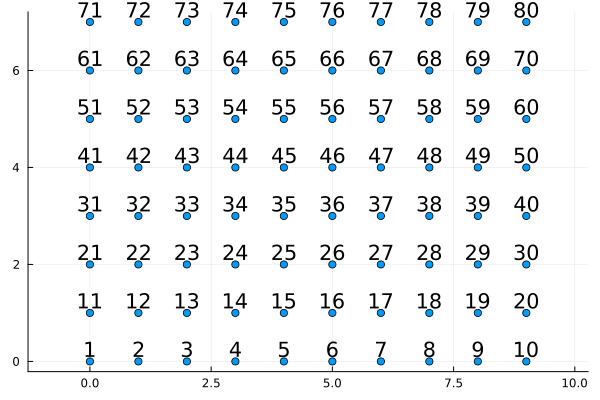

([0 0; 1 0; … ; 8 7; 9 7], nothing)

In [444]:
plot_square_lattice(Nx, Ny)

In [446]:
x = 0
ref_site = 45
V0 = [V_Strength,x*V_Strength,x*V_Strength,x*V_Strength,x*V_Strength]
Imp_Site = [ref_site,44,46,35,55]
N_Pin = 1

1

In [447]:
# Coords[37]
# site_idx = 14
# distance_func(Coords, Coords[ref_site], Coords[site_idx])
# Inner_Sites(1,ref_site,Coords)

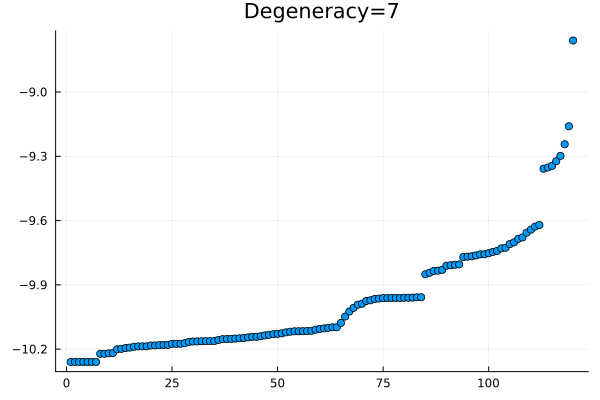

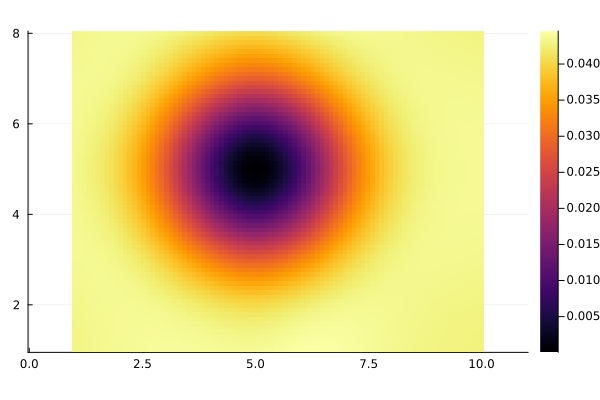

([-10.259893661385572, -10.259888381423233, -10.259881597062462, -10.25985865911546, -10.259849706046847, -10.259832555896622, -10.259819946323754, -10.221742722496304, -10.221628385488643, -10.219478901723292  …  -9.628060197307772, -9.620950581908918, -9.358078507922386, -9.352430291820474, -9.344829683972259, -9.322991859802052, -9.298133244779079, -9.24406522718409, -9.160085375514099, -8.759802847525304], [0.04311568645935531 0.04331847381059463 … 0.04364316346264467 0.043318473810594296; 0.04373499322666823 0.043749159103096034 … 0.043074330351503105 0.04374915910309598; … ; 0.04300440419226141 0.04321132074966575 … 0.04354381542930597 0.04321132074966684; 0.04283627839894587 0.04301795884744196 … 0.043424470241496975 0.04301795884744275])

In [448]:
ϵ, avg_density = impurity_control(V_Strength, V0, Imp_Site, N_Pin)

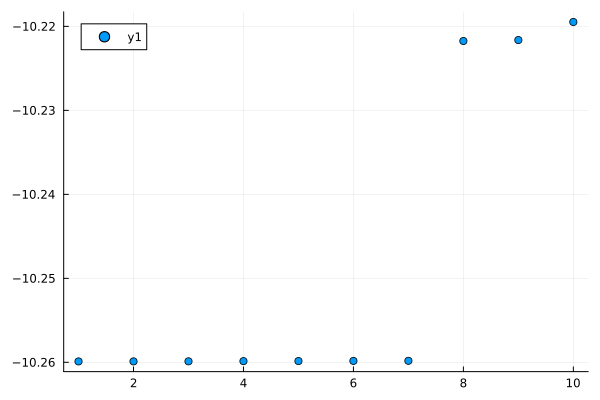

In [449]:
scatter(ϵ[1:10])

In [450]:
# Gap Ratio
(ϵ[3]-ϵ[2])/(ϵ[2]-ϵ[1])

1.2849259776715474

In [451]:
ref_par_density = get_ref_prtcl_density(par_num,p,q,NPhi,N_Pin)
sum(ref_par_density .- avg_density) 

0.4285714285714289

In [452]:
filling_frac = par_num / (NPhi-N_Pin)
frac_charge = (filling_frac)*N_Pin

0.42857142857142855

In [453]:
Coords = get_coords_square(Nx, Ny);

In [454]:
torus_distance_func(Coords, Coords[50], Coords[41])

1.0

# Masking Method

In [455]:
distance_array = []
for j in 1:N
    push!(distance_array,distance_func(Coords, Coords[ref_site], Coords[j]))
end
distance_array = reshape(distance_array,Nx,Ny)'

8×10 adjoint(::Matrix{Any}) with eltype Any:
 5.65685  5.0      4.47214  4.12311  …  4.47214  5.0      5.65685  6.40312
 5.0      4.24264  3.60555  3.16228     3.60555  4.24264  5.0      5.83095
 4.47214  3.60555  2.82843  2.23607     2.82843  3.60555  4.47214  5.38516
 4.12311  3.16228  2.23607  1.41421     2.23607  3.16228  4.12311  5.09902
 4.0      3.0      2.0      1.0         2.0      3.0      4.0      5.0
 4.12311  3.16228  2.23607  1.41421  …  2.23607  3.16228  4.12311  5.09902
 4.47214  3.60555  2.82843  2.23607     2.82843  3.60555  4.47214  5.38516
 5.0      4.24264  3.60555  3.16228     3.60555  4.24264  5.0      5.83095

In [442]:
dens_2 = avg_density'[1:end-1,:]
#dens_2.*(distance_array.<3)

8×10 Matrix{Float64}:
 0.0426012  0.0441825  0.0448666   …  0.0439341  0.0422459  0.0420183
 0.0437865  0.0447322  0.040669       0.0446079  0.0435539  0.0425582
 0.0447708  0.0408768  0.0275619      0.0408405  0.0446621  0.0440398
 0.0448691  0.0338925  0.0143926      0.0338584  0.0448264  0.046251
 0.0437856  0.0300444  0.00948221     0.0299894  0.043751   0.0461715
 0.0448691  0.0338925  0.0143926   …  0.0338584  0.0448264  0.046251
 0.0447708  0.0408768  0.0275619      0.0408405  0.0446621  0.0440398
 0.0437865  0.0447322  0.040669       0.0446079  0.0435539  0.0425582

In [456]:
dens_1 = avg_density'
#dens_1.*(distance_array.<3)

8×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0431157  0.043735   0.0440441  …  0.0435336  0.0430044  0.0428363
 0.0433185  0.0437492  0.0431743     0.0435662  0.0432113  0.043018
 0.0436432  0.0430743  0.0391935     0.0429337  0.0435438  0.0434245
 0.043656   0.0411728  0.032085      0.0410697  0.0435612  0.0437459
 0.0434814  0.0398949  0.0280224     0.0398058  0.0433883  0.0437777
 0.043656   0.0411728  0.032085   …  0.0410697  0.0435612  0.0437459
 0.0436432  0.0430743  0.0391935     0.0429337  0.0435438  0.0434245
 0.0433185  0.0437492  0.0431743     0.0435662  0.0432113  0.043018

In [457]:
distance_array.<=R_max[7]

8×10 BitMatrix:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  1  1  1  1  1  0  0  0
 0  0  1  1  1  1  1  0  0  0
 0  1  1  1  1  1  1  1  0  0
 0  0  1  1  1  1  1  0  0  0
 0  0  1  1  1  1  1  0  0  0
 0  0  0  0  1  0  0  0  0  0

In [458]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α)
braiding_density= ((1/2)/l_b^2)*(dens_2 .- 2*dens_1).*(distance_array.^2)

8×10 Matrix{Float64}:
 -0.438618  -0.339979  -0.271569   …  -0.338766  -0.439952  -0.56229
 -0.336547  -0.241837  -0.186559      -0.24047   -0.33669   -0.464403
 -0.267133  -0.184894  -0.127738      -0.183893  -0.266567  -0.390018
 -0.226675  -0.15222   -0.0781902     -0.151679  -0.225891  -0.336861
 -0.217032  -0.140652  -0.0585122     -0.140303  -0.21627   -0.325029
 -0.226675  -0.15222   -0.0781902  …  -0.151679  -0.225891  -0.336861
 -0.267133  -0.184894  -0.127738      -0.183893  -0.266567  -0.390018
 -0.336547  -0.241837  -0.186559      -0.24047   -0.33669   -0.464403

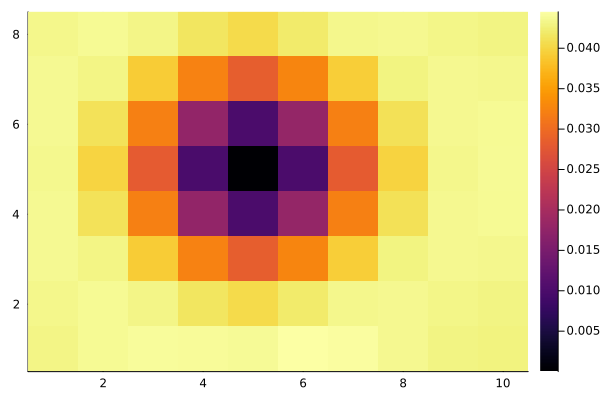

In [459]:
heatmap(dens_1)

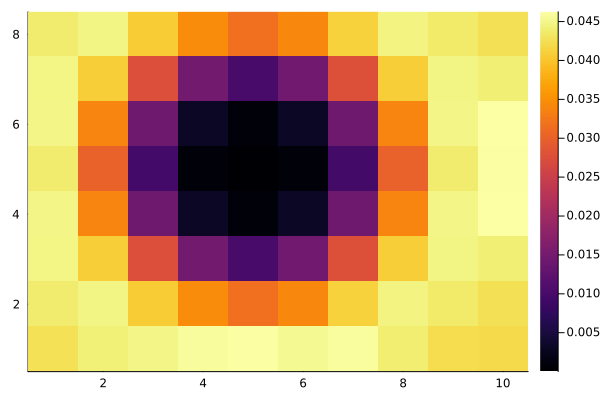

In [460]:
heatmap(dens_2)

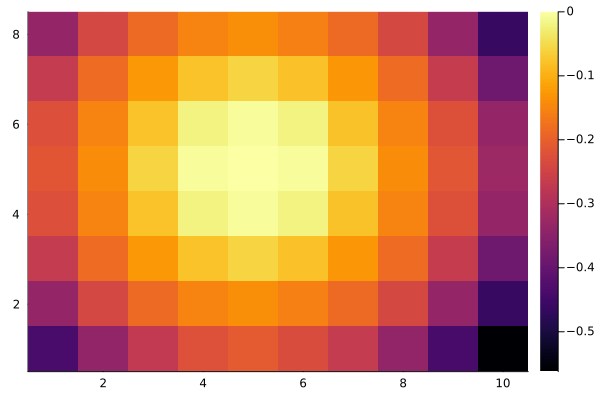

In [461]:
heatmap(braiding_density)

In [462]:
distance_array

8×10 adjoint(::Matrix{Any}) with eltype Any:
 5.65685  5.0      4.47214  4.12311  …  4.47214  5.0      5.65685  6.40312
 5.0      4.24264  3.60555  3.16228     3.60555  4.24264  5.0      5.83095
 4.47214  3.60555  2.82843  2.23607     2.82843  3.60555  4.47214  5.38516
 4.12311  3.16228  2.23607  1.41421     2.23607  3.16228  4.12311  5.09902
 4.0      3.0      2.0      1.0         2.0      3.0      4.0      5.0
 4.12311  3.16228  2.23607  1.41421  …  2.23607  3.16228  4.12311  5.09902
 4.47214  3.60555  2.82843  2.23607     2.82843  3.60555  4.47214  5.38516
 5.0      4.24264  3.60555  3.16228     3.60555  4.24264  5.0      5.83095

In [463]:
R_max = sort(unique(distance_array))

19-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.0990195135927845
 5.385164807134504
 5.656854249492381
 5.830951894845301
 6.4031242374328485

In [464]:
braiding_density

8×10 Matrix{Float64}:
 -0.438618  -0.339979  -0.271569   …  -0.338766  -0.439952  -0.56229
 -0.336547  -0.241837  -0.186559      -0.24047   -0.33669   -0.464403
 -0.267133  -0.184894  -0.127738      -0.183893  -0.266567  -0.390018
 -0.226675  -0.15222   -0.0781902     -0.151679  -0.225891  -0.336861
 -0.217032  -0.140652  -0.0585122     -0.140303  -0.21627   -0.325029
 -0.226675  -0.15222   -0.0781902  …  -0.151679  -0.225891  -0.336861
 -0.267133  -0.184894  -0.127738      -0.183893  -0.266567  -0.390018
 -0.336547  -0.241837  -0.186559      -0.24047   -0.33669   -0.464403

In [468]:
braid_phase = []
for r in R_max
    push!(braid_phase, sum(braiding_density .* (distance_array.<=r)))
end

In [469]:
av_braiding = sum(mod.(braid_phase,1))/length(braid_phase)

0.5382632099313204

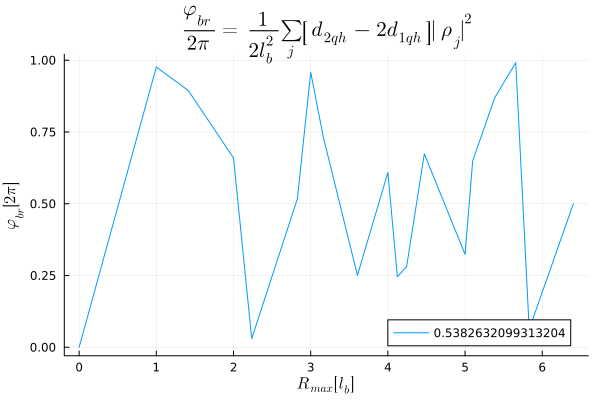

In [471]:
plot(R_max,mod.(braid_phase,1),xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_braiding)")

# Array Method

# 1 QH

In [357]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

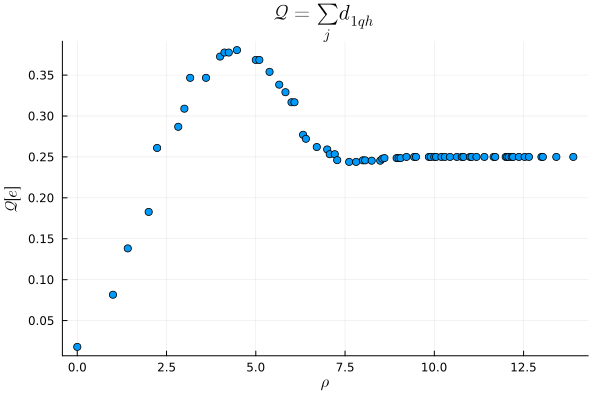

In [358]:
radius_list_1_qh, d_1_qh_list = fractional_charge(Nx, Ny, ref_site)
scatter(radius_list_1_qh, d_1_qh_list, xlabel=L"\rho", ylabel=L"\mathcal{Q}[e]", title=L"\mathcal{Q} = \sum_j d_{1qh}",legend=:false)

In [359]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

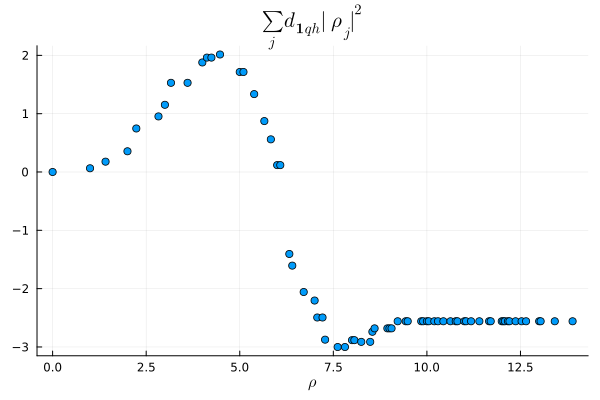

In [360]:
d_1_qh_list_2 = fractional_charge_2(Nx, Ny, ref_site)
scatter(radius_list_1_qh, d_1_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{\mathbf{1}qh} |\rho_j|^2", legend=:false)

In [168]:
# d_1_qh_site_list = []
# for j in 1:70
#     push!(d_1_qh_site_list, d_k_qh(j))
# end

In [169]:
# d_1_QH_Matrix = ref_par_density .- avg_density

# 2 QH

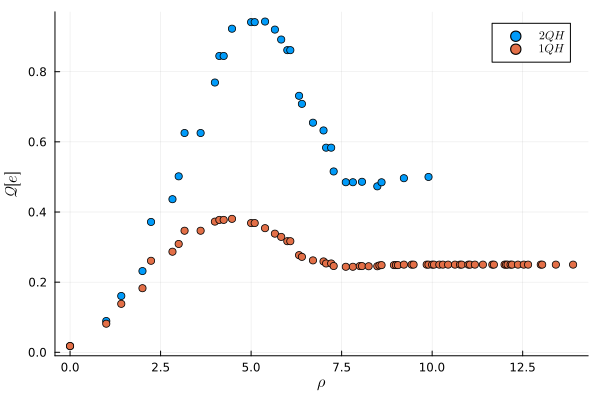

In [372]:
radius_list_2_qh, d_2_qh_list = fractional_charge(Nx, Ny, ref_site)
scatter(radius_list_2_qh, d_2_qh_list, label=L"2 QH")
scatter!(radius_list_1_qh, d_1_qh_list, label=L"1 QH", xlabel=L"ρ", ylabel=L"\mathcal{Q}[e]")

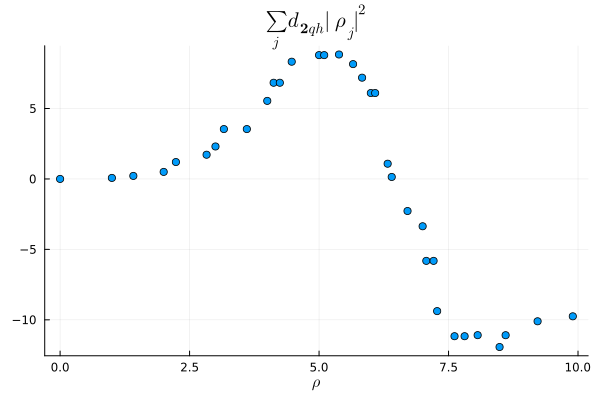

In [373]:
d_2_qh_list_2 = fractional_charge_2(Nx, Ny, ref_site)
scatter(radius_list_2_qh, d_2_qh_list_2, xlabel=L"\rho", title=L"\sum_j d_{ \mathbf{2} qh} |\rho_j|^2", legend=:false)

In [374]:
# d_2_qh_site_list = []
# for j in 1:80
#     push!(d_2_qh_site_list, d_k_qh(j))
# end

In [375]:
# d_2_QH_Matrix = ref_par_density .- avg_density

In [376]:
n = 29
radius_list_1_qh[1:n] == radius_list_2_qh[1:n]

true

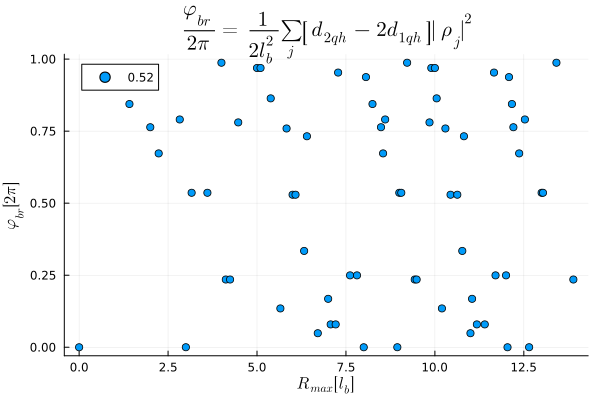

In [377]:
a = 1 # lattica constant
α = p/q # flux per plaquette
l_b = a/sqrt(2*pi*α) # magnetic length
ϕ = (1/2*l_b^2) * (d_2_qh_list_2[1:n] .- 2*d_1_qh_list_2[1:n])
ϕ = mod.(ϕ, 1)
av_br = round(sum(ϕ)/length(ϕ),digits=2)
scatter([radius_list_1_qh],[ϕ], xlabel=L"R_{max}[l_b]", ylabel=L"\varphi_{br}[2\pi]" ,title=L"\frac{\varphi_{br}}{2\pi} = \frac{1}{2l_b^2} \sum_j \left[d_{2qh}-2d_{1qh} \right] |\rho_j|^2", label="$(av_br)")

In [51]:
BRAIDING = []
for j in 1:19
    a = 1 # lattica constant
    α = p/q # flux per plaquette
    l_b = a/sqrt(2*pi*α)
    push!(BRAIDING,mod((pi/l_b^2) * (d_2_qh_list[j] .- 2* d_1_qh_list[j]) * radius_list_2_qh[j]^2, 2*pi))
end

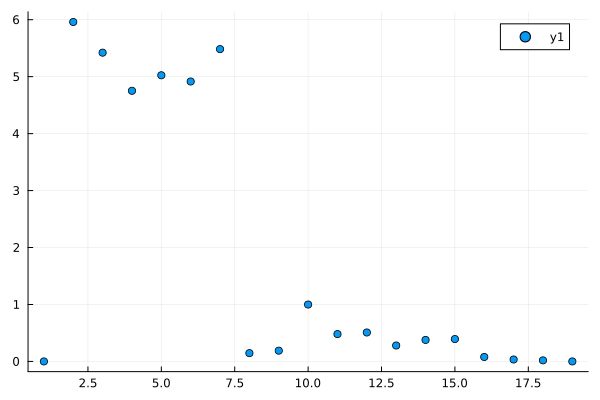

In [52]:
scatter(BRAIDING)

In [43]:
d_2_QH_Matrix'[2:end,:]

7×10 Matrix{Float64}:
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [44]:
d_1_QH_Matrix'

7×10 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

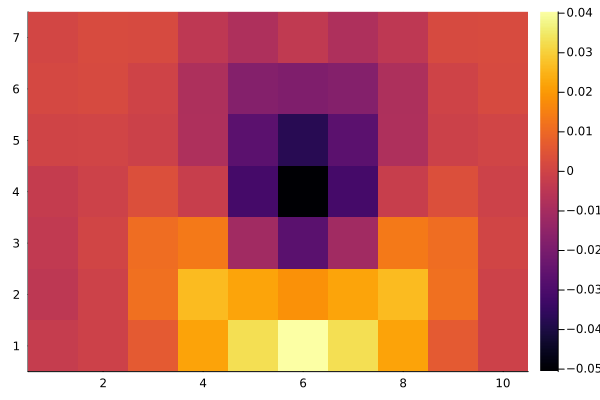

In [46]:
d_mat = (d_2_QH_Matrix'[2:end,:] .- 2*d_1_QH_Matrix') 
# ? * radius_list_2_qh[1:16][j]^2
heatmap(d_mat)

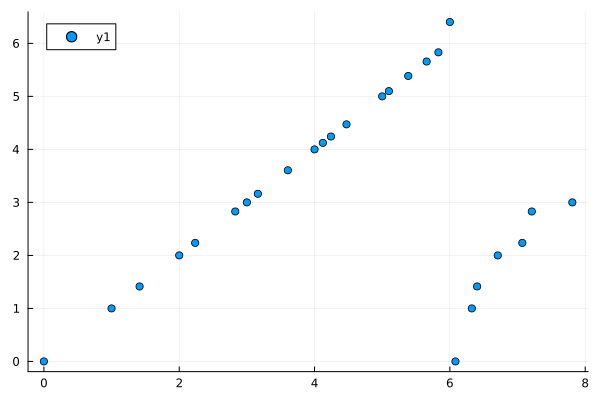

In [44]:
scatter(radius_list_1_qh,radius_list_2_qh)

In [177]:
# radius_list_1_qh[1:16] = radius_list_2_qh[1:16]
ρ_list = radius_list_1_qh[1:16];

In [178]:
d_1_qh_listt = d_1_qh_list[1:16]

16-element Vector{Any}:
 0.049999380622123425
 0.205668790979897
 0.32671336111759686
 0.39416932475783123
 0.49722906270988904
 0.513777939337057
 0.5211913730855289
 0.5332476490182907
 0.5332476490182907
 0.5251584303745862
 0.5202446296907528
 0.5202446296907528
 0.5120320894982568
 0.5072147603105793
 0.5072147603105793
 0.5034275883472364

In [37]:
d_2_qh_listt = d_2_qh_list[1:16]

16-element Vector{Any}:
 0.04999966557158243
 0.24747569125187546
 0.4350966567658118
 0.594378441360567
 0.866901146027672
 0.9408966004913278
 0.9973723670156989
 1.073858170772719
 1.073858170772719
 1.0819463516149823
 1.0547933734968191
 1.0547933734968191
 1.031142054065428
 1.0220850493806282
 1.0220850493806282
 1.0082216903420471

In [45]:
@nbinclude("../Braiding_Phase_Depletion_Script.ipynb")

get_braid_phase2 (generic function with 1 method)

In [44]:
#distance_func(Coords, Coords[ref_site], Coords[j])
radius_list

19-element Vector{Any}:
 0.0
 1.0
 1.4142135623730951
 2.0
 2.23606797749979
 2.8284271247461903
 3.0
 3.1622776601683795
 3.605551275463989
 4.0
 4.123105625617661
 4.242640687119285
 4.47213595499958
 5.0
 5.0990195135927845
 5.385164807134504
 5.656854249492381
 5.830951894845301
 6.4031242374328485

In [46]:
n = 16
φ_br_list = get_braid_phase(radius_list, d_2_qh_list, d_1_qh_list, p, q, n)

36
26
35
36
37
46
25
26
27
35
36
37
45
46
47
16
25
26
27
34
35
36
37
38
45
46
47
56
15
16
17
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
55
56
57
14
15
16
17
18
24
25
26
27
28
34
35
36
37
38
44
45
46
47
48
54
55
56
57
58
6
14
15
16
17
18
24
25
26
27
28
33
34
35
36
37
38
39
44
45
46
47
48
54
55
56
57
58
66
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
5
6
7
14
15
16
17
18
23
24
25
26
27
28
29
33
34
35
36
37
38
39
43
44
45
46
47
48
49
54
55
56
57
58
65
66
67
4
5
6
7
8
13
14
15
16
17
18
19
23
24
25
26
27
28
29
32
33
34
35
36
37
38
39
40
43
44
45
46
47
48
49
53
54
55
56
57
58
59
64
65
66
67
68
76
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
4
5
6
7
8
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
49
50
53
54
55
56
57
58
59
64
65
66
67
68
75
76
77
3
4
5
6
7
8
9
12
13
14


16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

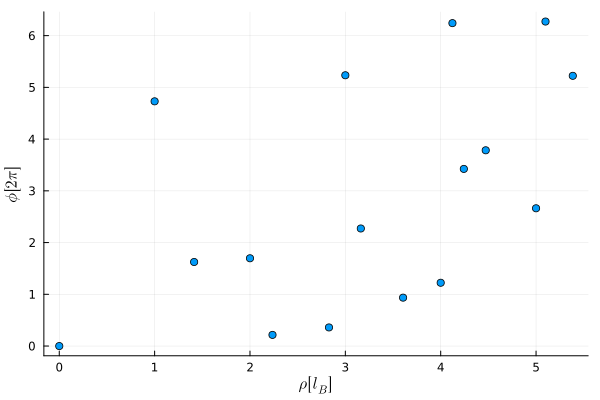

In [181]:
scatter(ρ_list, φ_br_list, xlabel=L"ρ[l_B]", ylabel=L"φ[2π]", legend=:false)

In [151]:
# 1 QH
d_mat_1_qh = ref_par_density .- avg_density'

7×10 Matrix{Float64}:
 -0.000510599  -0.000685625  -0.000959897  …  -0.000959897  -0.000685625
 -0.0012032    -0.00109324    0.000199024      0.000199024  -0.00109324
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.00207483   -0.00108582    0.0042201        0.0042201    -0.00108582
 -0.00189359   -0.00122845    0.00266856       0.00266856   -0.00122845
 -0.0012032    -0.00109324    0.000199024  …   0.000199024  -0.00109324
 -0.000510599  -0.000685625  -0.000959897     -0.000959897  -0.000685625

In [174]:
# 2 QH
d_mat_2_qh = ref_par_density .- avg_density'

8×10 Matrix{Float64}:
 -0.00114981   -0.000335694   0.000219841  …   0.000219841  -0.000335694
 -0.00369808   -0.00226415    0.00438916       0.00438916   -0.00226415
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00753096   -0.00223376    0.0161934        0.0161934    -0.00223376
 -0.00693168   -0.00300997    0.0119526        0.0119526    -0.00300997
 -0.00369808   -0.00226415    0.00438916   …   0.00438916   -0.00226415
 -0.00114981   -0.000335694   0.000219841      0.000219841  -0.000335694
 -0.000278627   0.000876359  -9.16338e-5      -9.16338e-5    0.000876359

In [194]:
(d_mat_2_qh[2:end,:] - 2*d_mat_1_qh)*ρ_list[3]^2

7×10 Matrix{Float64}:
 -0.00535376   -0.00178579    0.0126179    …   0.0126179    -0.00178579
 -0.00905058   -0.00164699    0.0231091        0.0231091    -0.00164699
 -0.00748758    0.000446272   0.0217126        0.0217126     0.000446272
 -0.00556404   -0.00167666    0.00702482       0.00702482   -0.00167666
  0.000178191   0.00038551   -0.0018959       -0.0018959     0.00038551
  0.00251315    0.00370156   -0.000356413  …  -0.000356413   0.00370156
  0.00148514    0.00449522    0.00365632       0.00365632    0.00449522